# Code Modified from:
https://github.com/ritvikmath/Time-Series-Analysis/blob/master/GARCH%20Model.ipynb

In [26]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [27]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

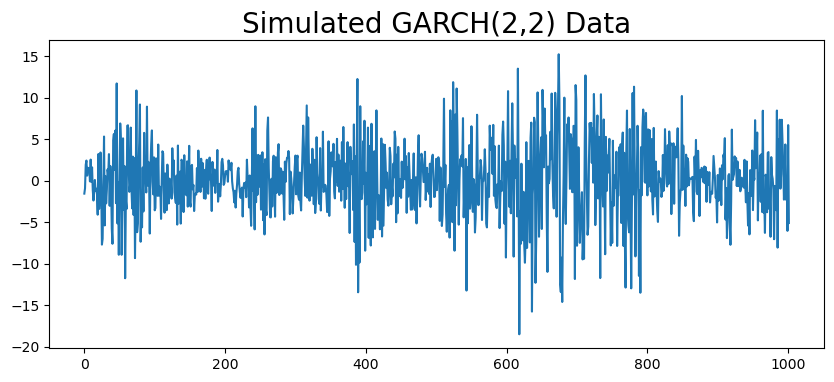

In [28]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

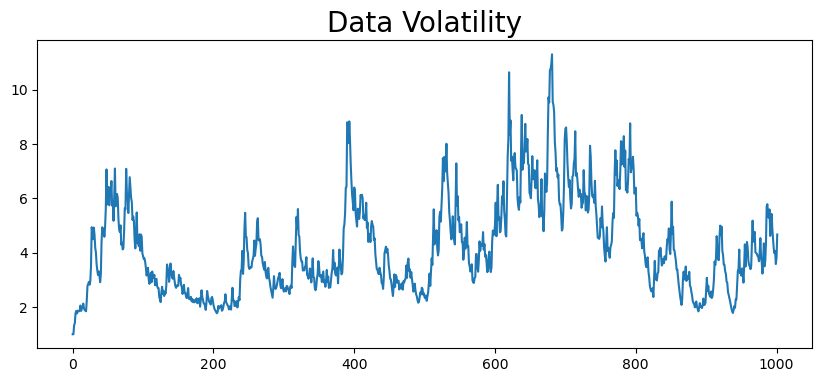

In [29]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

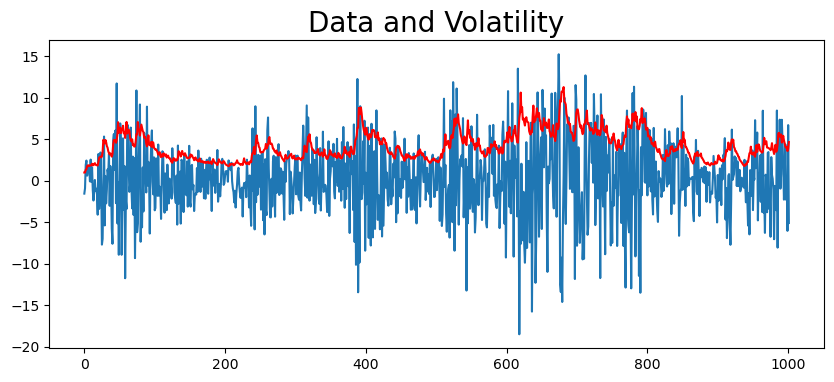

In [30]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot

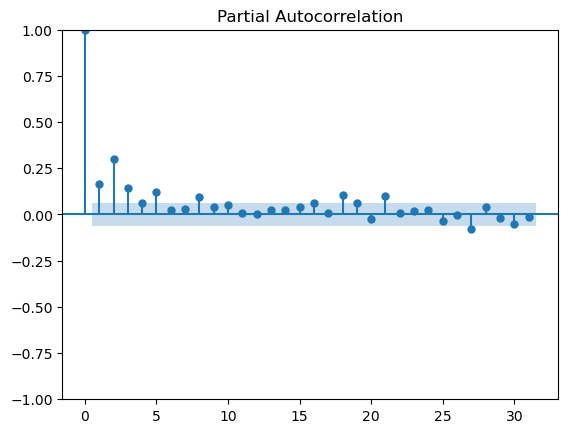

In [31]:
plot_pacf(np.array(series)**2)
plt.show()

# Fit the GARCH Model

In [32]:
train, test = series[:-test_size], series[-test_size:]

In [33]:
model = arch_model(train, p=2, q=2)

In [34]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 3307.571819321539
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5156.800215956315
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2641.576566819789
Iteration:      4,   Func. Count:     35,   Neg. LLF: 2510.649279240521
Iteration:      5,   Func. Count:     43,   Neg. LLF: 2502.977816650285
Iteration:      6,   Func. Count:     51,   Neg. LLF: 2502.119622358734
Iteration:      7,   Func. Count:     59,   Neg. LLF: 2504.9409138946394
Iteration:      8,   Func. Count:     68,   Neg. LLF: 2503.3277848746743
Iteration:      9,   Func. Count:     76,   Neg. LLF: 2501.7030569320646
Iteration:     10,   Func. Count:     83,   Neg. LLF: 2501.7021820228038
Iteration:     11,   Func. Count:     90,   Neg. LLF: 2501.701916054556
Iteration:     12,   Func. Count:     97,   Neg. LLF: 2501.701897138404
Iteration:     13,   Func. Count:    103,   Neg. LLF: 2501.7018971389416
Optimization terminated successfully    (Exit mode 0)
     

In [35]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2501.70
Distribution:                  Normal   AIC:                           5015.40
Method:            Maximum Likelihood   BIC:                           5044.23
                                        No. Observations:                  902
Date:                Fri, Apr 19 2024   Df Residuals:                      901
Time:                        09:12:36   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1345      0.105      1.282      0.200 [-7.121e-02,  0.340]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.3292      0.165      1.995  4.604e-02  [5.793e-03,  0.653]
alpha[1]       0.0483  3.837e-02      1.259      0.208 [-2.691e-02,  0.124]
alpha[2]       0.1486  5.101e-02      2.914  3.568e-03  [4.867e-02,  0.249]
beta[1]        0.5485      0.290      1.888  5.901e-02 [-2.086e-02,  1.118]
beta[2]        0.2461      0.250      0.986      0.324    [ -0.243,  0.736]
===========================================================================

Covariance estimator: robust
"""

# Predict

In [36]:
predictions = model_fit.forecast(horizon=test_size)

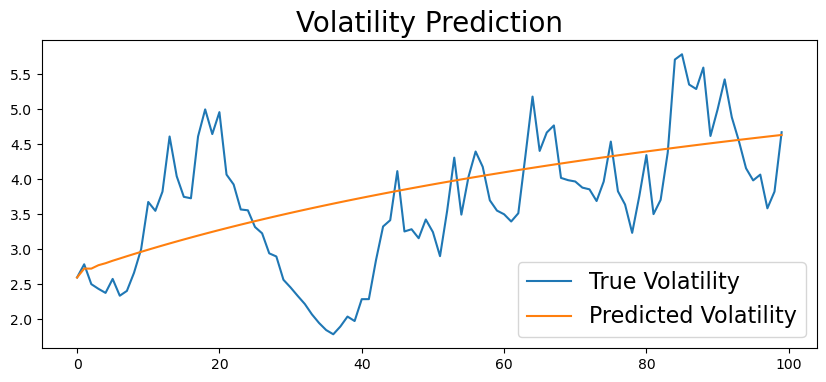

In [37]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

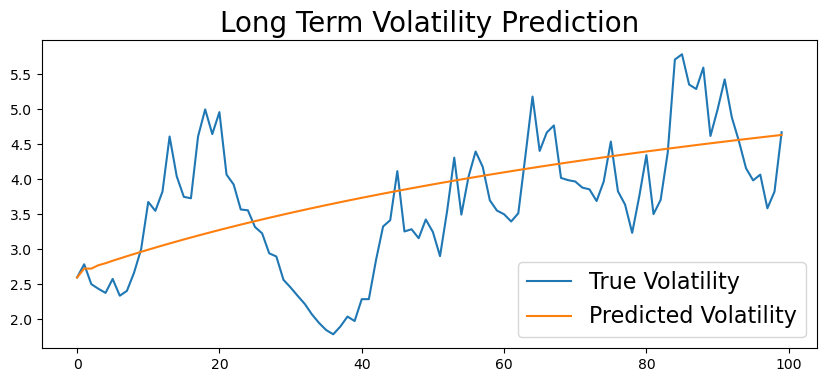

In [39]:
predictions_long_term = model_fit.forecast(horizon=100)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [40]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

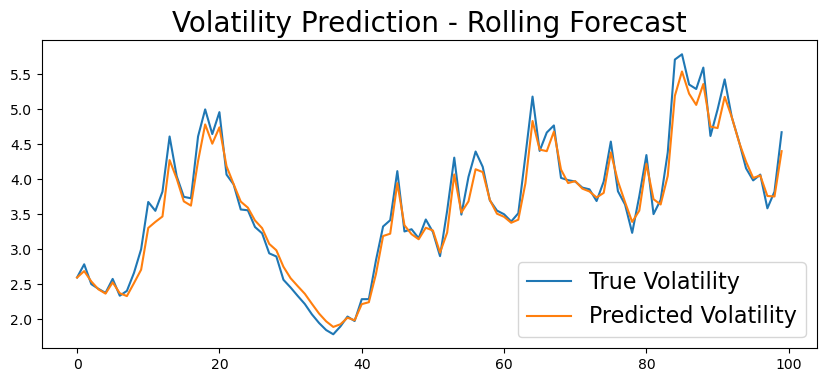

In [41]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)